# Hypothesis Testing Exercise

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [31]:
def hypotest(pvalue):
    alpha = 0.05
    print('alpha =',alpha,'pvalue =',pvalue)
    if pvalue <= alpha:
        print('We reject null hypothesis')
    else:
        print('We accept null hypothesis')

## Question 1
A F&B manager wants to determine whether there is any significant difference in the diameter of the cutlet between two units. A randomly selected sample of cutlets was collected from both units and measured? Analyze the data and draw inferences at 5% significance level. Please state the assumptions and tests that you carried out to check validity of the assumptions.\
Minitab File : Cutlets.mtw

In [2]:
cutlets = pd.read_csv('Cutlets.csv')

In [5]:
cutlets.head()

,Unit A,Unit B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522


null hypothesis, $H_0$ = mean of both sample is same\
alternate hypothesis, $H_a$ = mean of both sample is not equal\
alpha value, $\alpha = 0.05$

<Axes: xlabel='Unit A', ylabel='Count'>

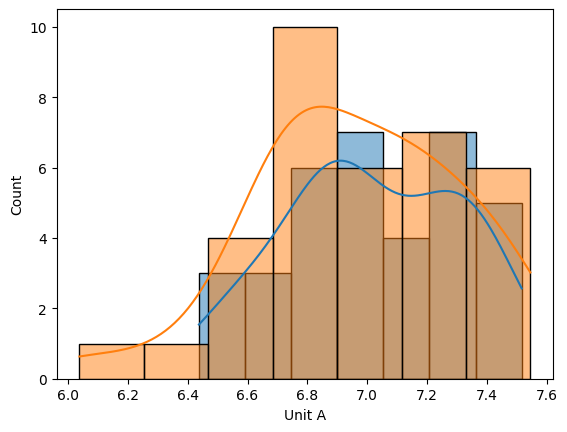

In [7]:
sns.histplot(cutlets['Unit A'],kde=True)
sns.histplot(cutlets['Unit B'],kde=True)

In [114]:
stat, pvalue = stats.ttest_ind(cutlets['Unit A'], cutlets['Unit B'])

In [115]:
hypotest(pvalue)

alpha = 0.05 pvalue = 0.47223947245995
We accept null hypothesis


here p value is greater than alpha value thus we accept the null hypothesis.\
So there is no significant diffence in the diameter of both units.

## Question 2
A hospital wants to determine whether there is any difference in the average Turn Around Time (TAT) of reports of the laboratories on their preferred list. They collected a random sample and recorded TAT for reports of 4 laboratories. TAT is defined as sample collected to report dispatch.\
Analyze the data and determine whether there is any difference in average TAT among the different laboratories at 5% significance level.\
Minitab File: LabTAT.mtw

In [8]:
labtat = pd.read_csv('LabTAT.csv')

Given, $\alpha = 0.05$

- null hypothesis, $H_0$: Mean of all samples are equal
- alternate hypothesis, $H_a$: Mean of all samples are not equal

In [34]:
stat, pvalue = stats.f_oneway(labtat['Laboratory 1'],labtat['Laboratory 2'],labtat['Laboratory 3'],labtat['Laboratory 4'])

In [35]:
hypotest(pvalue)

alpha = 0.05 pvalue = 2.1156708949992414e-57
We reject null hypothesis


Mean of all variables are not equal

## Question 3
Sales of products in four different regions is tabulated for males and females. Find if male-female buyer rations are similar across regions.
|       |East|West|North|South|
|-------|----|----|-----|-----|
|Males  |50  |142 |131  |70   |
|Females|550 |351 |480  |350  |

$H_0$: All proportions are equal\
$H_a$: All proportions are notequal

In [15]:
buyerratio = pd.read_csv('BuyerRatio.csv',index_col=[0])

In [16]:
buyerratio.head()

,East,West,North,South
Observed Values,,,,
Males,50,142,131,70
Females,435,1523,1356,750


In [18]:
stat, p, dof, exp = stats.chi2_contingency(buyerratio)
print('statistic={}\npvalue={}\ndof={}\nexpected_freq:\n{}'.format(stat,p,dof,exp))

statistic=1.595945538661058
pvalue=0.6603094907091882
dof=3
expected_freq:
[[  42.76531299  146.81287862  131.11756787   72.30424052]
 [ 442.23468701 1518.18712138 1355.88243213  747.69575948]]


In [30]:
observed = buyerratio.values.reshape(1,-1)[0]
expected = exp.reshape(1,-1)[0]
print(observed)
print(expected)

[  50  142  131   70  435 1523 1356  750]
[  42.76531299  146.81287862  131.11756787   72.30424052  442.23468701
 1518.18712138 1355.88243213  747.69575948]


In [32]:
stat, pvalue = stats.chisquare(observed,expected,ddof=3)

In [33]:
hypotest(pvalue)

alpha = 0.05 pvalue = 0.8095206647678864
We accept null hypothesis


## Question 4
TeleCall uses 4 centers around the globe to process customer order forms. They audit a certain %  of the customer order forms. Any error in order form renders it defective and has to be reworked before processing.  The manager wants to check whether the defective %  varies by centre. Please analyze the data at 5% significance level and help the manager draw appropriate inferences
Minitab File: CustomerOrderForm.mtw

alpha = 0.05

Hypothesis:\
$H_0$: The percentage of defective orders is same in all 4 centres\
$H_a$: The percentage of defective orders is not same in all 4 centres

In [106]:
orderform = pd.read_csv('Costomer+OrderForm.csv')

In [107]:
orderform.head()

,Phillippines,Indonesia,Malta,India
0,Error Free,Error Free,Defective,Error Free
1,Error Free,Error Free,Error Free,Defective
2,Error Free,Defective,Defective,Error Free
3,Error Free,Error Free,Error Free,Error Free
4,Error Free,Error Free,Defective,Error Free


In [108]:
df = orderform.melt().value_counts().rename_axis(['variable','value']).reset_index(name='counts')
df.pivot(index='value',columns='variable',values='counts')

variable,India,Indonesia,Malta,Phillippines
value,,,,
Defective,20,33,31,29
Error Free,280,267,269,271


In [109]:
table = df.pivot(index='value',columns='variable',values='counts').values

In [110]:
stat, p, dof, exp = stats.chi2_contingency(table)
print('statistic={}\npvalue={}\ndof={}\nexpected_freq:\n{}'.format(stat,p,dof,exp))

statistic=3.858960685820355
pvalue=0.2771020991233135
dof=3
expected_freq:
[[ 28.25  28.25  28.25  28.25]
 [271.75 271.75 271.75 271.75]]


In [111]:
observed = table.reshape(1,-1)[0]
expected = exp.reshape(1,-1)[0]
print(observed)
print(expected)

[ 20  33  31  29 280 267 269 271]
[ 28.25  28.25  28.25  28.25 271.75 271.75 271.75 271.75]


In [112]:
stat, pvalue = stats.chisquare(observed,expected,ddof=3)

In [113]:
hypotest(pvalue)

alpha = 0.05 pvalue = 0.4254298144535761
We accept null hypothesis
